In [13]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import StrMethodFormatter
import math
import sys
import copy
import skinny
import helpers 
import dpautils

from scipy import stats
from array import array
from operator import xor

np.set_printoptions(threshold=sys.maxsize)

In [14]:
N=20
std=0.5
number_of_experiments=50
Ns=list(range(1,N,1))
TK1_0=[0,1,2,3] # 3x traces
TK1_1=[4,5,6,7]
TK1_2_unsorted=[0,1,2,3] # 3x traces
Tk1_3_unsorted=[8,9,10,11]

keys=np.random.randint(2147483647, 9223372036854775807, size=number_of_experiments, dtype=np.int64)  

In [15]:
P=helpers.gen_plaintexts(N)

# Precompute intermediate values and power traces for different keys

intermediate_values=[]
for key in keys:
    val=dpautils.compute_intemediate_values(P,int(keys[0]))
    interm_values=val[0]
    clear_text=val[1]
    TK1=val[2].A1
    T = dpautils.gen_traces(interm_values, std)
    intermediate_values.append([interm_values,clear_text,TK1,T])

In [16]:
def normalized_probs(scores):
    log_likelihoods = np.array(scores)
    likelihoods = 2.0**(log_likelihoods - log_likelihoods.max())
    normalized_likelihoods = likelihoods / likelihoods.sum()
    return normalized_likelihoods

In [17]:
prob_of_correct_simultaneous=[]
for n in Ns:
    prob_of_correct_pr_key=[]
    for i,key in enumerate(keys):
        clear_text = intermediate_values[i][1]
        TK1 = intermediate_values[i][2]
        T = intermediate_values[i][3]
        
        t=T[:n]
        ct=clear_text[:n]
        
        for j in range(4):
            nibble_prob=1
            scores=dpautils.simultanous_atk_scores(t,ct,j)
            normalized_likelihoods=normalized_probs(scores)
            nibble_prob *= normalized_likelihoods[TK1[j]]
            prob_of_correct_pr_key.append(nibble_prob)
            nibble_prob=1
            scores=dpautils.individual_atk_scores(t,ct,j+8)
            normalized_likelihoods=normalized_probs(scores)
            nibble_prob *= normalized_likelihoods[TK1[j+8]]
            prob_of_correct_pr_key.append(nibble_prob)

    prob_of_correct_simultaneous.append(np.average(prob_of_correct_pr_key))

In [18]:
prob_of_correct_individual=[]
for n in Ns:
    prob_of_correct_pr_key=[]
    for i,key in enumerate(keys):
        clear_text = intermediate_values[i][1]
        TK1 = intermediate_values[i][2]
        T = intermediate_values[i][3]
        
        t=T[:n]
        ct=clear_text[:n]
        
        for j in range(4):
            nibble_prob=1
            scores=dpautils.individual_atk_scores(t,ct,j)
            normalized_likelihoods=normalized_probs(scores)
            nibble_prob *= normalized_likelihoods[TK1[j]]
            prob_of_correct_pr_key.append(nibble_prob)
            nibble_prob=1
            scores=dpautils.individual_atk_scores(t,ct,j+8)
            normalized_likelihoods=normalized_probs(scores)
            nibble_prob *= normalized_likelihoods[TK1[j+8]]
            prob_of_correct_pr_key.append(nibble_prob)

    prob_of_correct_individual.append(np.average(prob_of_correct_pr_key))

In [19]:
m=[0.0,0.0,0.0]
m = copy.copy(prob_of_correct_simultaneous)
m.insert(0,0.0)
n1=copy.deepcopy(m)
m.insert(0,0.0)
n2=copy.deepcopy(m)
m.insert(0,0.0)
n3=copy.deepcopy(m)

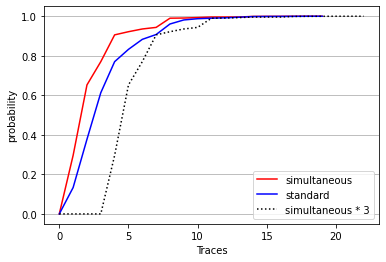

In [20]:
prob_of_correct_simultaneous.insert(0,0.0)
prob_of_correct_individual.insert(0,0.0)
plt.figure()
plt.ylabel('probability')
plt.xlabel('Traces')
plt.plot(np.array(prob_of_correct_simultaneous), label="simultaneous", c="red")
plt.plot(np.array(prob_of_correct_individual), label="standard", c="blue")
prob_of_correct_simultaneous.insert(0,0.0)
prob_of_correct_simultaneous.insert(0,0.0)
prob_of_correct_simultaneous.insert(0,0.0)
plt.plot(np.array(prob_of_correct_simultaneous), linestyle=':', label="simultaneous * 3", c="black")

plt.grid(axis='y')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
plt.legend()
plt.draw()
plt.savefig("probability_half_key_recovery")

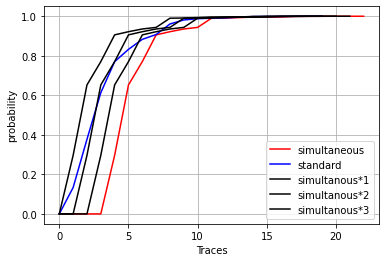

In [21]:
plt.figure()
plt.ylabel('probability')
plt.xlabel('Traces')
plt.plot(np.array(prob_of_correct_simultaneous), label="simultaneous", c="red")
plt.plot(np.array(prob_of_correct_individual), label="standard", c="blue")
plt.plot(np.array(n1),label="simultanous*1",c="black")
plt.plot(np.array(n2),label="simultanous*2",c="black")
plt.plot(np.array(n3),label="simultanous*3",c="black")

plt.grid()
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
plt.legend()
plt.draw()
plt.savefig("simultaneous_probs_shifted")

1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1, 1, 1]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1, 1, 1]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1, 1, 1]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1, 1, 1]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1, 1, 1]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

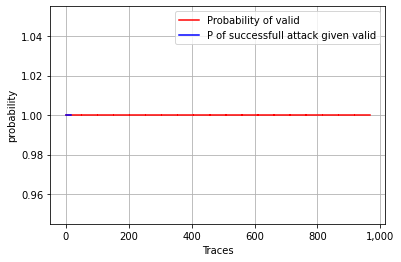

In [22]:
pr_valid=[] #probabilities of the distinguisher outputting a guess
prob_of_correct_unanimous=[] # probability of selecting the correct guess
target_nibble=0
all_guesses=[]


for n in Ns:
    prob_of_correct_pr_key_unanimous_pr_n=[]
    pr_valid_pr_n=[]
    for i,key in enumerate(keys):
        clear_text = intermediate_values[i][1]
        TK1 = intermediate_values[i][2]
        T = intermediate_values[i][3]
            
        kdi=helpers.determine_kdi(target_nibble) 

        V = []
        scores=[]
        for ind in kdi:
            V.append(np.matrix(dpautils.compute_v(ind,clear_text)))
            scores.append(dpautils.distinguisher(V[kdi.index(ind)],T,ind))

            a=np.matrix(scores)
        
        argmax_scores = [score.index(max(score)) for score in scores] #Argmax of list of scores 
        print(argmax_scores)
        nibble_prob=1
        if len(set(argmax_scores)) == 1:
            s= a.sum(axis=0).A1
            normalized_likelihoods=normalized_probs(s)
            nibble_prob *= normalized_likelihoods[TK1[target_nibble]]
            prob_of_correct_pr_key_unanimous_pr_n.append(nibble_prob)
            print(prob_of_correct_pr_key_unanimous_pr_n)

            pr_valid.append(1)
        else:
            pr_valid_pr_n.append(0)

    pr_valid.append(np.average(pr_valid_pr_n))
    prob_of_correct_unanimous.append(np.average(prob_of_correct_pr_key_unanimous_pr_n))
print(pr_valid)
print(prob_of_correct_unanimous)

plt.figure()
plt.ylabel('probability')
plt.xlabel('Traces')
plt.plot(np.array(pr_valid), label="Probability of valid", c="red")
plt.plot(np.array(prob_of_correct_unanimous), label="P of successfull attack given valid", c="blue")

plt.grid()
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
plt.legend()
plt.draw()

In [23]:
prob_of_correct_individual=[]
for n in Ns:
    prob_of_correct_pr_key=[]
    for i,key in enumerate(keys):
        clear_text = intermediate_values[i][1]
        TK1 = intermediate_values[i][2]
        T = intermediate_values[i][3]
        
        t=T[:n]
        ct=clear_text[:n]
        nibble_prob=1
        for j in range(4):
            scores=dpautils.individual_atk_scores(t,ct,j)
            normalized_likelihoods=normalized_probs(scores)
            nibble_prob *= normalized_likelihoods[TK1[j]]
            prob_of_correct_pr_key.append(nibble_prob)

            scores=dpautils.individual_atk_scores(t,ct,j+8)
            normalized_likelihoods=normalized_probs(scores)
            nibble_prob *= normalized_likelihoods[TK1[j+8]]
            prob_of_correct_pr_key.append(nibble_prob)

    prob_of_correct_individual.append(np.average(prob_of_correct_pr_key))